In [ ]:
import zipfile
!rm /content/download
!rm -r /content/mammals/train
!rm -r /content/mammals/test
!wget https://vc.ee.duth.gr:6960/index.php/s/HUtNngKpQctMI1x/download
local_zip = '/content/download'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

train_dir = '/content/mammals/train'
test_dir = '/content/mammals/test'

--2024-02-02 10:20:43--  https://vc.ee.duth.gr:6960/index.php/s/HUtNngKpQctMI1x/download
Resolving vc.ee.duth.gr (vc.ee.duth.gr)... 83.212.140.54
Connecting to vc.ee.duth.gr (vc.ee.duth.gr)|83.212.140.54|:6960... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20285846 (19M) [application/zip]
Saving to: ‘download’

download            100%[===================>]  19.35M  6.47MB/s    in 3.0s    

2024-02-02 10:20:47 (6.47 MB/s) - ‘download’ saved [20285846/20285846]



In [ ]:
import os

base_dir = '/content/mammals'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


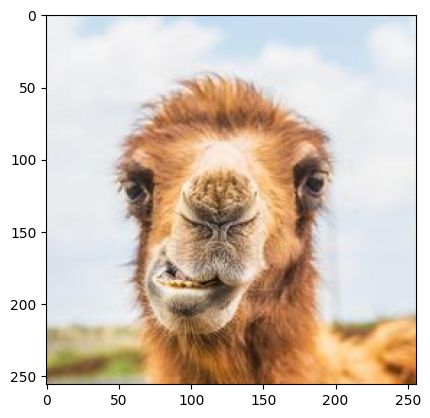

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "/content/mammals/train/camel/camel-0001.jpg"
img = mpimg.imread(img_path)
plt.imshow(img, cmap='gray')

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

split_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = split_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    target_size=(150,150),
                                                    subset='training',
                                                    seed=42)
# --------------------
# Flow validation images in batches of 20 using test_datagen generator - FIND OPTIMAL VALUES
# --------------------
validation_generator =  split_datagen.flow_from_directory(train_dir,
                                                         batch_size=32,
                                                         class_mode  = 'categorical',
                                                         color_mode='rgb',
                                                         target_size=(150,150),
                                                         subset='validation',
                                                         seed=42)

Found 997 images belonging to 5 classes.
Found 248 images belonging to 5 classes.


In [ ]:
import tensorflow as tf

# Model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00044),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 17, 17, 128)      

In [ ]:


callbacks = []

save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callbacks.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, verbose=1)
callbacks.append(early_stop_callback)

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    #steps_per_epoch=,
                    epochs=20,
                    #validation_steps=,
                    #verbose=1,
                    callbacks=callbacks)

Epoch 1/20
32/32 [==============================] - ETA: 0s - loss: 1.5474 - accuracy: 0.3611
Epoch 1: val_loss improved from inf to 1.34179, saving model to best_weights.hdf5
32/32 [==============================] - 61s 2s/step - loss: 1.5474 - accuracy: 0.3611 - val_loss: 1.3418 - val_accuracy: 0.3992
Epoch 2/20
32/32 [==============================] - ETA: 0s - loss: 1.2222 - accuracy: 0.4574
Epoch 2: val_loss improved from 1.34179 to 1.20923, saving model to best_weights.hdf5
32/32 [==============================] - 63s 2s/step - loss: 1.2222 - accuracy: 0.4574 - val_loss: 1.2092 - val_accuracy: 0.4960
Epoch 3/20
32/32 [==============================] - ETA: 0s - loss: 1.1026 - accuracy: 0.5256
Epoch 3: val_loss improved from 1.20923 to 1.16893, saving model to best_weights.hdf5
32/32 [==============================] - 63s 2s/step - loss: 1.1026 - accuracy: 0.5256 - val_loss: 1.1689 - val_accuracy: 0.5323
Epoch 4/20
32/32 [==============================] - ETA: 0s - loss: 1.0644 - 

In [ ]:
test_datagen  = ImageDataGenerator(rescale=1./255)
test_dir = os.path.join(base_dir, 'test')
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=50,
                                                         class_mode  = 'categorical',
                                                         color_mode='rgb',
                                                         target_size=(150,150))
loss, acc = model.evaluate(test_generator)
print(acc)

Found 250 images belonging to 5 classes.
5/5 [==============================] - 3s 575ms/step - loss: 0.9254 - accuracy: 0.6880
0.6880000233650208


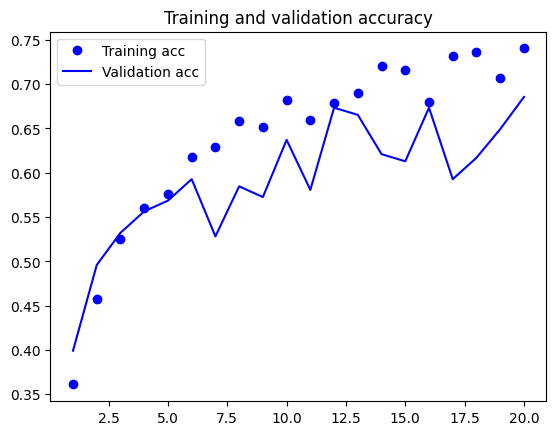

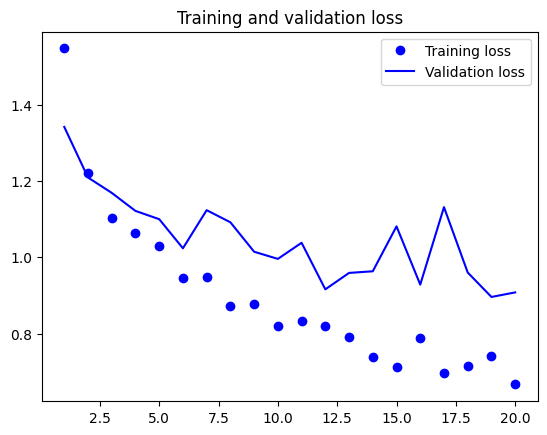

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()